### PART 1: Theoretical foundations

### The Beta-Binomial model

Starting with a Beta-Binomial model defined as:

$$ \theta \sim \text{Beta}(1,1) $$
$$ k \sim \text{Binomial}(\theta,n)$$

With the conjugate prior, the posterior will be: 
$$ \theta \mid n, k \sim \text{Beta}(k+1, n-k+1), $$

### Analytical solution with Beta(1,1) (uniform) prior:
The analytical solution for the marginal likelihood can be derived as follows:

$$ P \ (k \mid n) = \int^1_0 p \ (k \mid \theta, n) \cdot p \ (\theta) \ d \ (\theta) = \int^1_0 \underbrace{{n \choose k} \ \theta^k \ (1-\theta)^{n-k}}_\text{Binomial PMF} \cdot 1 \ d \ (\theta). $$

However, $Beta(\alpha,\beta) = \int^1_0 t^{\alpha-1} \ (1-t)^{\beta-1} \ d \ (t)$ and $Beta(\alpha, \beta) = \dfrac{\Gamma(\alpha) \cdot \Gamma(\beta)}{\Gamma(\alpha+\beta)} \ \ \ (1)$. 

Therefore:

$$ P(k \mid n) = {n \choose k} Beta(k+1, n-k+1) =  \underbrace{\dfrac{\Gamma(n+1)}{\Gamma(k+1) \ \Gamma(n-k+1)}}_\text{Combinatorial term} \ \underbrace{\dfrac{\Gamma(k+1) \ \Gamma(n-k+1)}{\Gamma(n+2)}}_\text{Beta term} = \dfrac{\Gamma(n+1)}{\Gamma(n+2)} = \dfrac{\Gamma(n+1)}{(n+1)\Gamma(n+1)} = \dfrac{1}{n+1}$$

\begin{equation*}
P(k \mid n) = \dfrac{1}{n+1}
\label{eq:an_1} \tag{1}
\end{equation*}

### Analytical solution with Jeffreys prior
First, we need to derive the Jeffreys prior formulation for the Binomial likelihood:

$$ p_j(\theta) = \sqrt{I(\theta)} = \sqrt{-\mathcal{E} \ \Big [\dfrac{d^{2}\mathcal{L}(\theta \mid k)}{d \theta^{2}} \Big ]} $$

$$ p(k \mid \theta) = {n \choose k} \ \theta^k (1-\theta)^{n-k} $$

Estimate log-likelihood and its first and second derivative:

$$\log( \ p \ (k \mid \theta) \ ) \propto k \log(\theta) (n-k) \log(1-\theta) $$

$$ \dfrac{d\mathcal{L(\theta \mid k)}}{d\theta} = \dfrac{k}{\theta} - \dfrac{n-k}{(1-\theta)^2} $$

$$ \dfrac{d^2\mathcal{L(\theta \mid k)}}{d\theta^2} = - \dfrac{k}{\theta^2} - \dfrac{n-k}{(1-\theta)^2} $$

Plug second derivative of the Binomial log-likelihood in the Jeffreys prior estimation:

$$ p_j(\theta) = \sqrt{I(\theta)} = \sqrt{- \mathcal{E}\ \Big [\dfrac{d^{2}\mathcal{L}(\theta \mid k)}{d \theta^{2}} \Big ]} \xrightarrow{\text{$\mathcal{E} \ [Bin \ (\theta, \ n) \ = \ n\theta]$}} \sqrt{\dfrac{n\theta}{\theta^2}} + \dfrac{n(1-\theta)}{(1-\theta)^2} = $$

$$ = \sqrt{\dfrac{n}{\theta(1-\theta)}} = \sqrt{n\theta^{-1}(1-\theta)^{-1}} \propto \theta^{-1/2} \cdot (1-\theta)^{-1/2} $$

Finally, the analytical solution for the marginal likelihood can be derived as follows:

$$ p(k \mid n) = \int^1_0 p(k \mid n, \theta) \ p_j(\theta) \ d\theta = $$

$$ = \int^1_0 {n \choose k} \ \theta^k \ (1-\theta)^{n-k} \ \theta^{-1/2} \ (1-\theta)^{-1/2} \ d\theta = $$

$$ = \int^1_0 {n \choose k} \ \theta^{(k-1/2)} \ (1-\theta)^{(n-k-1/2)} $$

\begin{equation*}
p(k \mid n) = {n \choose k} Beta(k + 0.5, \ n - k + 0.5)
\tag{2}
\end{equation*}


$$ \text{and} $$

\begin{equation*}
Beta(k + 0.5, \ n - k + 0.5) = \dfrac{\Gamma(k + 0.5) \cdot \Gamma(n-k+0.5)}{\Gamma(n+1)}
\tag{3}
\end{equation*}

In [1]:
import seaborn as sns
import scipy.stats as st
import theano
import matplotlib.pyplot as plt
import numpy as np
import math

%config InlineBackend.figure_format = 'retina'

In [2]:
# Observed Data
k = 2
n = 10

### PART 2: Example with Beta(1,1) (uniform) prior

Let's start by exploring the first case with a Beta(1,1) prior.

Since Beta is a conjugate prior for the Binomial, the posterior will be a Beta($k+\alpha, n-k+\beta$). For n=10 and k=2, the posterior will be a Beta(3,9).

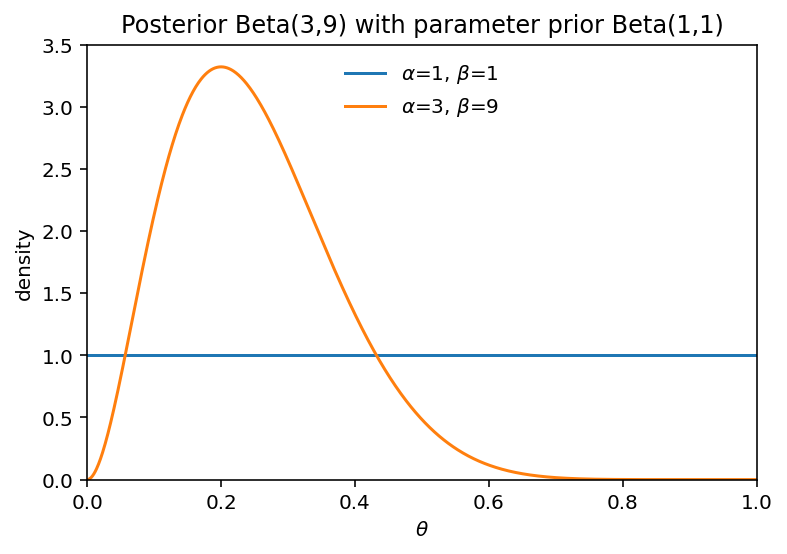

In [3]:
alpha = beta = 1
x = np.linspace(0.0, 1.0, 1000)
f = lambda a, b : st.beta.pdf(x, a, b)

fig, ax = plt.subplots()
plot_pdf = lambda a, b : ax.plot(x, f(a,b), label=r'$\alpha$={0}, $\beta$={1}'.format(a,b))
plot_pdf(alpha, beta)
plot_pdf(k+alpha, n-k+beta)
plt.legend(loc='upper center', frameon=False)
ax.set(xlim=[0,1], ylim=[0,3.5], xlabel=r'$\theta$', ylabel='density')
plt.title("Posterior Beta(3,9) with parameter prior Beta(1,1)")
plt.show()

The closed form solution of the marginal likelihood for prior Beta(1,1) is estimated in part 1 and expressed in formula (1):

In [4]:
# marginal likelihood
m_l = 1/(n + 1)
print('The analytical solution of the marginal likelihood is %.5f'%(m_l))

The analytical solution of the marginal likelihood is 0.09091


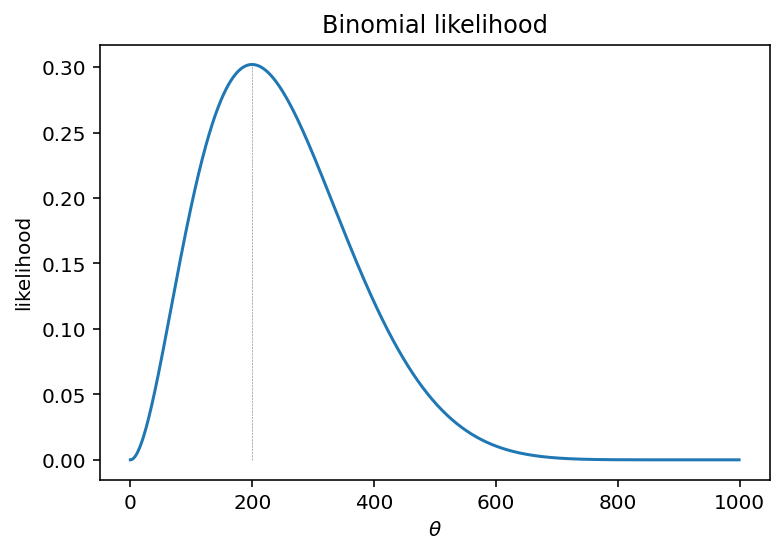

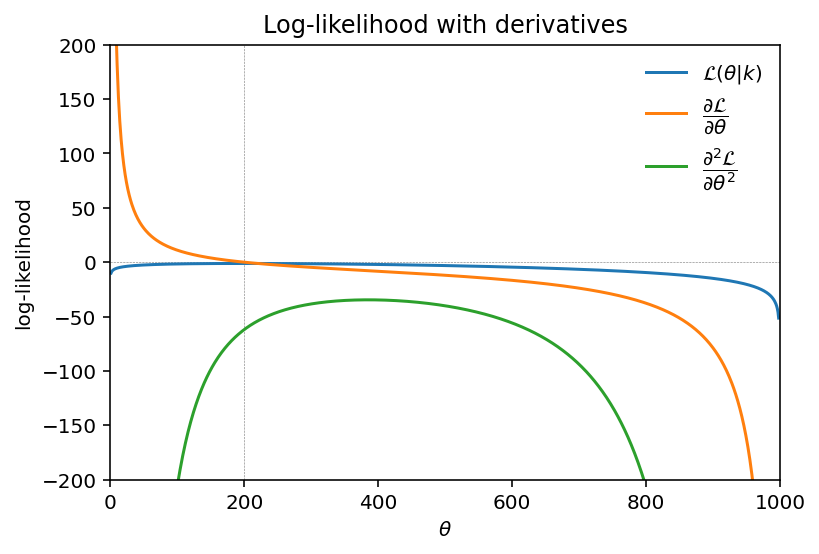

In [5]:
bin_l = np.empty(1000)

theta = np.linspace(0.0, 1.0, 1000)
bin_l = st.binom.pmf(k,n,theta)
bin_ll = np.log(bin_l)
bin_ll_1 = np.diff(bin_ll)/np.diff(theta) #theano
bin_ll_2 = np.diff(bin_ll_1)/np.diff(theta[:-1])

plt.plot(bin_l)
plt.vlines(np.argmax(bin_l), np.min(bin_l), np.max(bin_l), linestyles = 'dashed', color='gray', linewidth=0.3)
plt.xlabel(r'$\theta$')
plt.ylabel('likelihood')
plt.title('Binomial likelihood')
plt.show()

fig, ax = plt.subplots()
plt.plot(bin_ll, label=r'$\mathcal{L}(\theta|k)$')
plt.plot(bin_ll_1, label=r'$\dfrac{\partial\mathcal{L}}{\partial\theta}$')
plt.plot(bin_ll_2, label=r'$\dfrac{\partial^2\mathcal{L}}{\partial\theta^2}$')
plt.vlines(np.argmax(bin_ll), -200, 200, linestyles = 'dashed', color='gray', linewidth=0.3)
plt.hlines(0, 0, 1000, linestyles = 'dashed', color='gray', linewidth=0.3)
ax.set(xlim=[0,1000], ylim=[-200, 200], xlabel=r'$\theta$', ylabel='log-likelihood')
plt.title('Log-likelihood with derivatives')
plt.legend(loc='upper right', frameon=False)
plt.show()

### Taylor approximation

$$\mathcal{L}(\theta | k) \approx \mathcal{L}(\hat{\theta}|k) + (\theta - \hat{\theta}) \cdot \dfrac{\partial \mathcal{L}(\hat{\theta}|k)}{\partial\theta} + \dfrac{(\theta-\hat{\theta})^2}{2} \cdot \dfrac{\partial^2\mathcal{L}(\hat{\theta}|k)}{\partial\theta^2}$$

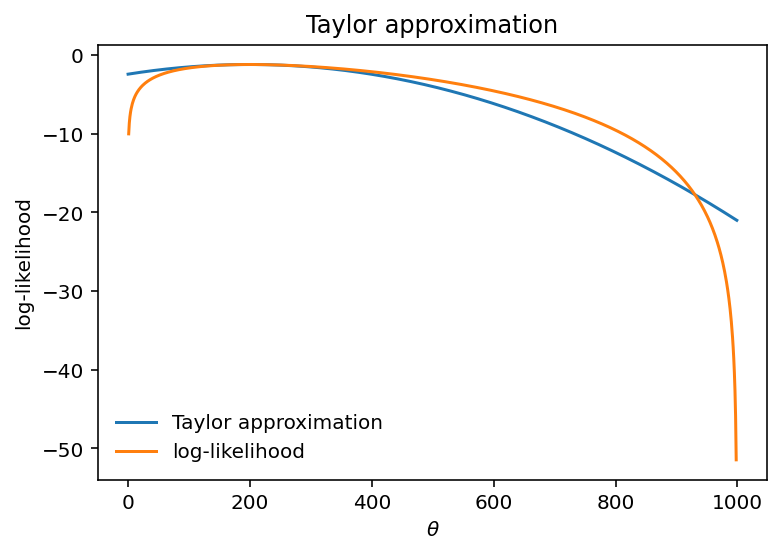

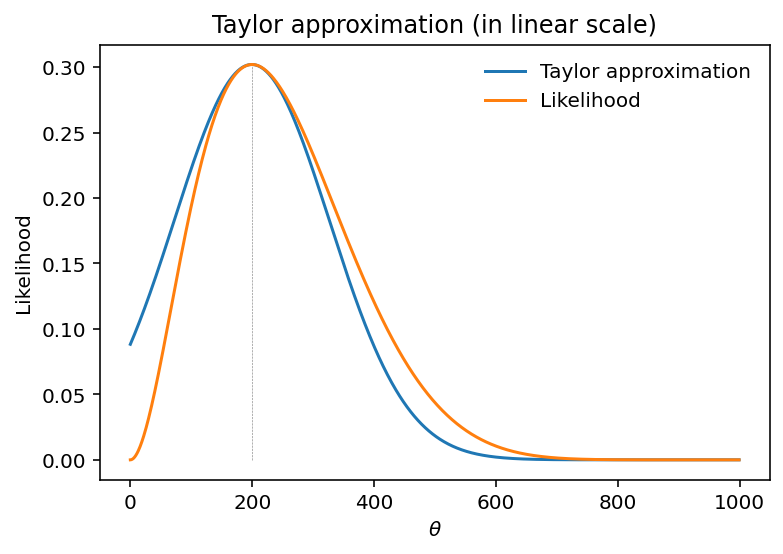

In [6]:
theta_hat = np.argmax(bin_ll)
ta = np.empty(1000)


for th in range(0, 1000):
    ta[th] = bin_ll[theta_hat] + ((th/1000 - theta_hat/1000))*bin_ll_1[theta_hat] + ((((th/1000-theta_hat/1000))**2)/2) * bin_ll_2[theta_hat]

plt.plot(ta, label='Taylor approximation')
plt.plot(bin_ll, label='log-likelihood')
plt.xlabel(r'$\theta$')
plt.ylabel('log-likelihood')
plt.title('Taylor approximation')
plt.legend(loc='lower left', frameon=False)
plt.show()

plt.plot(np.e**ta, label='Taylor approximation')
plt.plot(bin_l, label='Likelihood')
plt.xlabel(r'$\theta$')
plt.ylabel('Likelihood')
plt.vlines(np.argmax(bin_l), np.min(bin_l), np.max(bin_l), linestyles = 'dashed', color='gray', linewidth=0.3)
plt.title('Taylor approximation (in linear scale)')
plt.legend(loc='upper right', frameon=False)
plt.show()

### Marginal likelihood approximation

#### Uniform prior

$ - \log p^n(x^n;\mathcal{M}) = - \log \int \exp ( \log \ p^n(x^n;\ \theta)) \cdot \pi(\theta) d\theta \approx - \log \int \exp \Big( \underbrace{ \log \ p^n(x^n;\hat{\theta})-\dfrac{1}{2} \ (\theta-\hat{\theta})^T \ I(x^n:\hat{\theta}) \ (\theta-\hat{\theta}) }_{\text{2nd order Taylor expansion}} \Big) \ \pi(\theta) \ d\theta $

For Uniform prior $ \theta $ ~ Beta(1,1) $\pi(\theta)$ will be 1

Therefore, the integral $ \int_{0}^{1} \exp \Big( \underbrace{ \log \ p^n(x^n;\hat{\theta})-\dfrac{1}{2} \ (\theta-\hat{\theta})^T \ I(x^n:\hat{\theta}) \ (\theta-\hat{\theta}) }_{\text{2nd order Taylor expansion}} \Big) \ d\theta $

In [7]:
from scipy.integrate import quad

def integrand(th, n, k, theta_hat):

    return np.exp(bin_ll[theta_hat] + ((th - theta_hat/1000))*bin_ll_1[theta_hat] + ((((th-theta_hat/1000))**2)/2) * bin_ll_2[theta_hat])
    
I = quad(integrand, 0, 1, args=(n,k, theta_hat))

print("Integral approximation: ", I[0]) #??
print("Analytical solution: ", 1/(1+n))

Integral approximation:  0.09056670895362073
Analytical solution:  0.09090909090909091


### PART 3: Example with Jeffreys prior

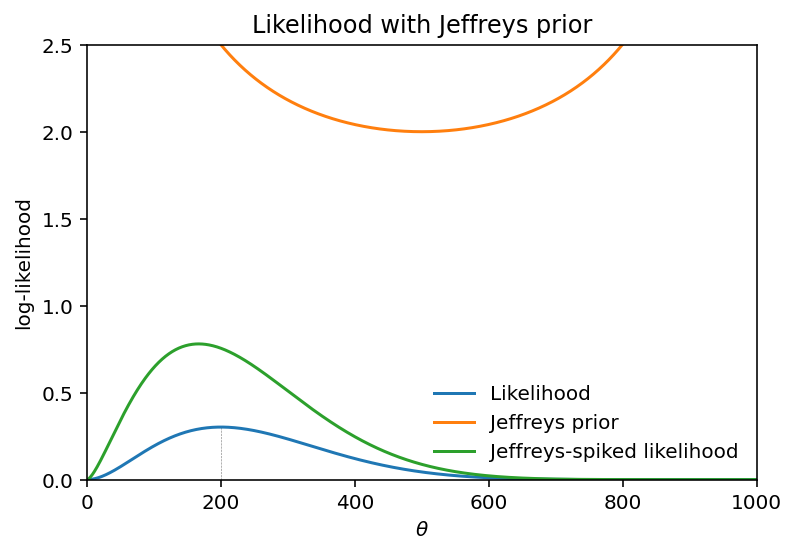

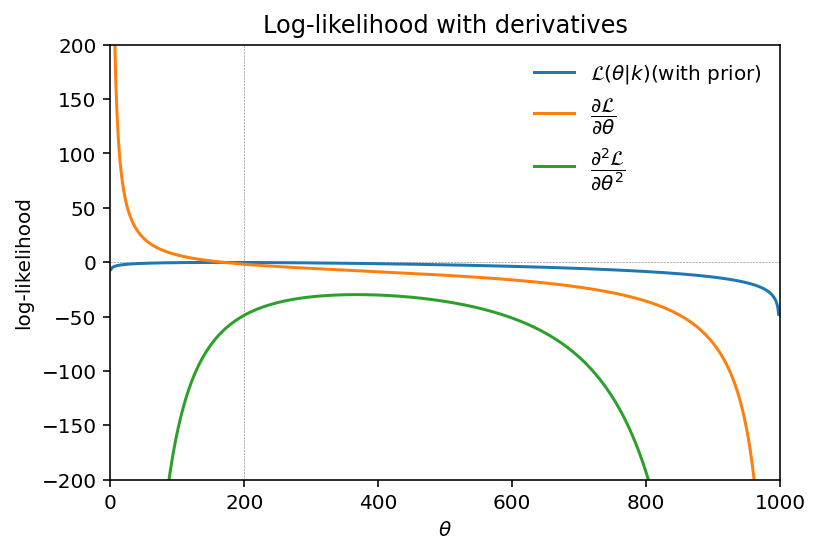

In [8]:
bin_l = np.empty(1000)

theta = np.linspace(0.0, 1.0, 1000)
pj = theta**(-0.5)*(1-theta)**(-0.5)
bin_l = st.binom.pmf(k,n,theta)
theta_hat = np.argmax(bin_l)
prod = math.comb(n,k)*(theta**(k-0.5))*((1-theta)**(n-k-0.5))

ll = np.log(prod)
ll_1 = np.diff(ll)/np.diff(theta) #theano
ll_2 = np.diff(ll_1)/np.diff(theta[:-1])


fig, ax = plt.subplots()
plt.plot(bin_l, label='Likelihood')
plt.plot(pj, label='Jeffreys prior')
plt.plot(prod, label='Jeffreys-spiked likelihood')
plt.xlabel(r'$\theta$')
plt.ylabel('Likelihood')
plt.vlines(np.argmax(bin_l), np.min(bin_l), np.max(bin_l), linestyles = 'dashed', color='gray', linewidth=0.3)
plt.title('Likelihood with Jeffreys prior')
ax.set(xlim=[0,1000], ylim=[0, 2.5], xlabel=r'$\theta$', ylabel='log-likelihood')
plt.legend(loc='lower right', frameon=False)
plt.show()

fig, ax = plt.subplots()
plt.plot(ll, label=r'$\mathcal{L}(\theta|k)$(with prior)')
plt.plot(ll_1, label=r'$\dfrac{\partial\mathcal{L}}{\partial\theta}$')
plt.plot(ll_2, label=r'$\dfrac{\partial^2\mathcal{L}}{\partial\theta^2}$')
plt.vlines(theta_hat, -200, 200, linestyles = 'dashed', color='gray', linewidth=0.3)
plt.hlines(0, 0, 1000, linestyles = 'dashed', color='gray', linewidth=0.3)
ax.set(xlim=[0,1000], ylim=[-200, 200], xlabel=r'$\theta$', ylabel='log-likelihood')
plt.title('Log-likelihood with derivatives')
plt.legend(loc='upper right', frameon=False)
plt.show()

The process of calculating the Jeffreys prior for the Binomial model and the derivation of the closed form solution for the marginal likelihood are explained under part 1. The closed form solution for the marginal likelihood is expressed in equation (2), using the Gamma function formulation in (3):

In [9]:
# marginal likelihood
m_l = ((np.math.gamma(k-0.5+1))/np.math.gamma(k+1)) * (np.math.gamma(n-k-0.5+1)/np.math.gamma(n-k+1))
print('The analytical solution of the marginal likelihood is %.5f'%(m_l))

The analytical solution of the marginal likelihood is 0.23136


### Taylor approximation of $ p(k|\theta) \ \pi_{j}(\theta) $:

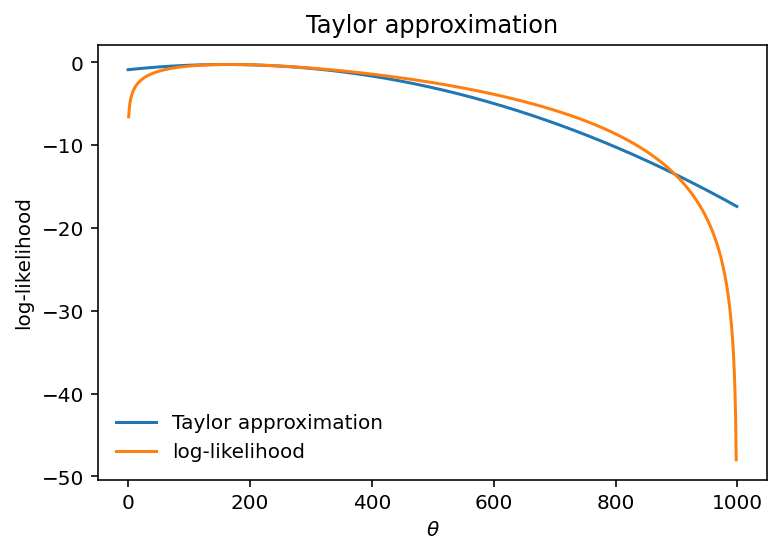

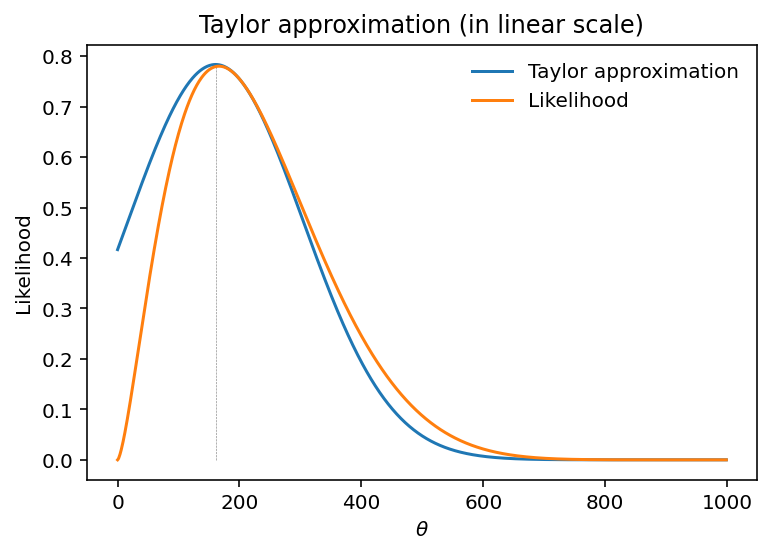

In [10]:
ta = np.empty(1000)

for th in range(0, 1000):
    ta[th] = ll[theta_hat] + ((th/1000 - theta_hat/1000))*ll_1[theta_hat] + ((((th/1000-theta_hat/1000))**2)/2) * ll_2[theta_hat]

plt.plot(ta, label='Taylor approximation')
plt.plot(ll, label='log-likelihood')
plt.xlabel(r'$\theta$')
plt.ylabel('log-likelihood')
plt.title('Taylor approximation')
plt.legend(loc='lower left', frameon=False)
plt.show()

plt.plot(np.e**ta, label='Taylor approximation')
plt.plot(prod, label='Likelihood')
plt.xlabel(r'$\theta$')
plt.ylabel('Likelihood')
plt.vlines(np.argmax(np.e**ta), np.min(np.e**ta), np.max(np.e**ta), linestyles = 'dashed', color='gray', linewidth=0.3)
plt.title('Taylor approximation (in linear scale)')
plt.legend(loc='upper right', frameon=False)
plt.show()

In [11]:
from scipy.integrate import quad

def integrand(th, n, k, theta_hat):

    return np.exp(ll[theta_hat] + ((th - theta_hat/1000))*ll_1[theta_hat] + ((((th-theta_hat/1000))**2)/2) * ll_2[theta_hat])    

I = quad(integrand, 0, 1, args=(n,k, theta_hat))

print("Integral approximation: ", I[0])
print("Analytical solution: ", ((np.math.gamma(k-0.5+1))/np.math.gamma(k+1)) * (np.math.gamma(n-k-0.5+1)/np.math.gamma(n-k+1)))

Integral approximation:  0.24439602120214762
Analytical solution:  0.23135546179790867
